In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [4]:
data = pd.read_csv(r'd:\Users\Fuuuuuuuuuun\Desktop\Files\nyu class\Principals of Urban Informatics\wildfre_cleaned.csv')
data.shape

(1880465, 10)

In [5]:
data.dropna(inplace = True) 
data.shape

(1202317, 10)

In [11]:
data.describe()

,year,latitude,longitude,fire_size,month,day
count,1.202317e+06,1.202317e+06,1.202317e+06,1.202317e+06,1.202317e+06,1.202317e+06
mean,2.005323e+03,3.641300e+01,-9.268203e+01,5.958460e+01,5.785268e+00,1.549126e+01
std,6.614889e+00,5.580167e+00,1.541989e+01,1.993968e+03,3.018884e+00,8.746799e+00
min,1.992000e+03,1.794492e+01,-1.644497e+02,1.000000e-05,1.000000e+00,1.000000e+00
25%,2.000000e+03,3.231670e+01,-9.888993e+01,1.000000e-01,3.000000e+00,8.000000e+00
50%,2.006000e+03,3.491735e+01,-8.837511e+01,1.000000e+00,5.000000e+00,1.500000e+01
75%,2.011000e+03,4.076227e+01,-8.183190e+01,3.900000e+00,8.000000e+00,2.300000e+01
max,2.015000e+03,6.728330e+01,-6.528807e+01,5.581983e+05,1.200000e+01,3.100000e+01


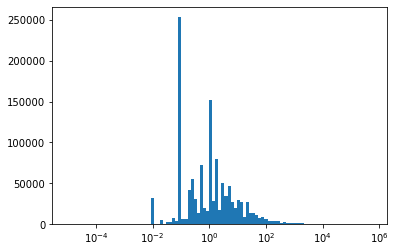

In [19]:
def plot_loghist(x, bins): #introduce a function for plotting a log-scale histogram
  #it ensures log-scale binning and label on the original scale
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),bins)
    plt.hist(x, bins=logbins)
    plt.xscale('log')
    
plot_loghist(data['fire_size'], 100)

In [22]:
data = data.loc[(data['fire_size']>0.05)&(data['fire_size']<5000)]
data.shape

(1152876, 10)

In [29]:
data.cause.unique()

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Railroad', 'Children', 'Smoking',
       'Missing/Undefined', 'Structure', 'Fireworks', 'Powerline'],
      dtype=object)

In [31]:
 from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire','Equipment Use', 'Arson', 'Railroad', 'Children', 'Smoking',\
             'Missing/Undefined', 'Structure', 'Fireworks', 'Powerline'])
data['label']=le.transform(data['cause'])
data.head()

,year,cause,latitude,longitude,state,discovery_date,fire_size,county,month,day,label
0,2005,Miscellaneous,40.036944,-121.005833,CA,2005-02-02,0.10,Plumas,2,2,7
1,2004,Lightning,38.933056,-120.404444,CA,2004-05-12,0.25,Placer,5,12,6
2,2004,Debris Burning,38.984167,-120.735556,CA,2004-05-31,0.10,El Dorado,5,31,3
3,2004,Lightning,38.559167,-119.913333,CA,2004-06-28,0.10,Alpine,6,28,6
4,2004,Lightning,38.559167,-119.933056,CA,2004-06-28,0.10,Alpine,6,28,6


In [38]:
feature = data[['latitude','longitude','fire_size','month','year']]
feature=feature.values
target = data[['label']]
target=target.values
X_train, X_test, y_train, y_test = train_test_split(feature, target, train_size=0.7) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(807013, 5) (345863, 5) (807013, 1) (345863, 1)


In [39]:
dt_model = DecisionTreeClassifier() 
dt_model.fit(X_train,y_train) 

DecisionTreeClassifier()

In [41]:
test_predict_result = dt_model.predict(X_test) #对dt_model使用.predict方法，预测产生预测结果（在测试集中的预测结果）

test_true_result =y_test
#使用sklearn.metrics模块中的accuracy_score方法计算模型预测准确度
as_test = accuracy_score(test_true_result,test_predict_result) #传入测试集中的真实结果（标签）和模型在测试集上的预测结果（标签）
print("accuracy_score: \n The prediction accuracy on the test set is：", as_test)

accuracy_score: 
 The prediction accuracy on the test set is： 0.495889991123653
